# TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras

In [ ]:
https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

In [6]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))

In [7]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

In [11]:
# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

# MLP for Binary Classification

In [12]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.922
Predicted: 0.987


# MLP for Multiclass Classification

In [13]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.980
Predicted: [[0.981261   0.01707636 0.00166268]] (class=0)


# MLP for Regression

In [1]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(339, 13) (167, 13) (339,) (167,)
MSE: 70.415, RMSE: 8.391
Predicted: 30.195


# Develop Convolutional Neural Network Models

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


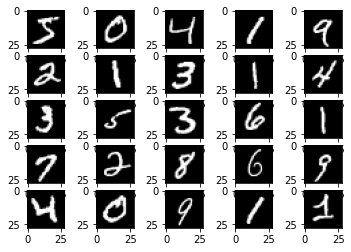

In [2]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [3]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.987
Predicted: class=5


# 3.3 Develop Recurrent Neural Network Models

In [5]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

(91, 5, 1) (12, 5, 1) (91,) (12,)
Epoch 1/350
3/3 - 1s - loss: 122839568.0000 - mae: 9346.4453 - val_loss: 29103510.0000 - val_mae: 4179.1089
Epoch 2/350
3/3 - 0s - loss: 40062064.0000 - mae: 5114.6743 - val_loss: 80436104.0000 - val_mae: 7705.0747
Epoch 3/350
3/3 - 0s - loss: 61863960.0000 - mae: 6315.8350 - val_loss: 47118016.0000 - val_mae: 5963.9858
Epoch 4/350
3/3 - 0s - loss: 31364292.0000 - mae: 4531.0957 - val_loss: 19323442.0000 - val_mae: 3561.8125
Epoch 5/350
3/3 - 0s - loss: 20466508.0000 - mae: 3617.0049 - val_loss: 30313594.0000 - val_mae: 4210.9224
Epoch 6/350
3/3 - 0s - loss: 23852846.0000 - mae: 3944.6030 - val_loss: 29958362.0000 - val_mae: 4246.8042
Epoch 7/350
3/3 - 0s - loss: 19675866.0000 - mae: 3551.6384 - val_loss: 17459062.0000 - val_mae: 3104.8196
Epoch 8/350
3/3 - 0s - loss: 13272091.0000 - mae: 2944.1353 - val_loss: 14625565.0000 - val_mae: 3429.6917
Epoch 9/350
3/3 - 0s - loss: 13702340.0000 - mae: 2935.0457 - val_loss: 16914958.0000 - val_mae: 3804.2275
Ep

Epoch 78/350
3/3 - 0s - loss: 8285272.5000 - mae: 2270.6299 - val_loss: 12693843.0000 - val_mae: 2817.2458
Epoch 79/350
3/3 - 0s - loss: 8224399.0000 - mae: 2245.9661 - val_loss: 12545113.0000 - val_mae: 2841.0105
Epoch 80/350
3/3 - 0s - loss: 8348388.5000 - mae: 2277.5442 - val_loss: 12621512.0000 - val_mae: 2872.9756
Epoch 81/350
3/3 - 0s - loss: 8185004.5000 - mae: 2275.2019 - val_loss: 12293387.0000 - val_mae: 2845.8894
Epoch 82/350
3/3 - 0s - loss: 8094761.0000 - mae: 2263.8740 - val_loss: 12653549.0000 - val_mae: 2782.1025
Epoch 83/350
3/3 - 0s - loss: 8300745.0000 - mae: 2228.5056 - val_loss: 12505559.0000 - val_mae: 2791.9395
Epoch 84/350
3/3 - 0s - loss: 8193634.5000 - mae: 2259.7812 - val_loss: 12536881.0000 - val_mae: 2897.1191
Epoch 85/350
3/3 - 0s - loss: 8387191.5000 - mae: 2305.1692 - val_loss: 12528020.0000 - val_mae: 2784.7551
Epoch 86/350
3/3 - 0s - loss: 8518626.0000 - mae: 2307.9875 - val_loss: 12362248.0000 - val_mae: 2827.3640
Epoch 87/350
3/3 - 0s - loss: 7891565

3/3 - 0s - loss: 8542837.0000 - mae: 2254.2703 - val_loss: 11648620.0000 - val_mae: 2837.5178
Epoch 155/350
3/3 - 0s - loss: 7097190.0000 - mae: 2086.2012 - val_loss: 12084281.0000 - val_mae: 2716.3411
Epoch 156/350
3/3 - 0s - loss: 7647675.0000 - mae: 2179.8862 - val_loss: 11366283.0000 - val_mae: 2754.1902
Epoch 157/350
3/3 - 0s - loss: 7200319.5000 - mae: 2052.0183 - val_loss: 12165301.0000 - val_mae: 2934.9016
Epoch 158/350
3/3 - 0s - loss: 7520135.0000 - mae: 2111.8025 - val_loss: 11532091.0000 - val_mae: 2694.3289
Epoch 159/350
3/3 - 0s - loss: 7814512.5000 - mae: 2181.7869 - val_loss: 11588507.0000 - val_mae: 2811.6199
Epoch 160/350
3/3 - 0s - loss: 7472958.0000 - mae: 2150.9749 - val_loss: 11333221.0000 - val_mae: 2712.9390
Epoch 161/350
3/3 - 0s - loss: 7285819.0000 - mae: 2120.4265 - val_loss: 11676685.0000 - val_mae: 2848.3591
Epoch 162/350
3/3 - 0s - loss: 7418650.0000 - mae: 2119.2668 - val_loss: 11364529.0000 - val_mae: 2733.1038
Epoch 163/350
3/3 - 0s - loss: 7530420.500

Epoch 230/350
3/3 - 0s - loss: 7077196.5000 - mae: 2048.6284 - val_loss: 10998163.0000 - val_mae: 2692.4319
Epoch 231/350
3/3 - 0s - loss: 7055500.0000 - mae: 2069.3733 - val_loss: 10886993.0000 - val_mae: 2802.9729
Epoch 232/350
3/3 - 0s - loss: 6932782.5000 - mae: 2058.7502 - val_loss: 10872009.0000 - val_mae: 2694.4053
Epoch 233/350
3/3 - 0s - loss: 6935097.0000 - mae: 2064.0364 - val_loss: 10878199.0000 - val_mae: 2741.9036
Epoch 234/350
3/3 - 0s - loss: 7125998.5000 - mae: 2074.7849 - val_loss: 10926169.0000 - val_mae: 2702.6682
Epoch 235/350
3/3 - 0s - loss: 6980876.0000 - mae: 2051.8149 - val_loss: 10789042.0000 - val_mae: 2706.7803
Epoch 236/350
3/3 - 0s - loss: 7306631.0000 - mae: 2092.4268 - val_loss: 10803447.0000 - val_mae: 2763.8425
Epoch 237/350
3/3 - 0s - loss: 6884604.0000 - mae: 2061.4233 - val_loss: 11066960.0000 - val_mae: 2689.8645
Epoch 238/350
3/3 - 0s - loss: 7536237.5000 - mae: 2124.7288 - val_loss: 10994079.0000 - val_mae: 2852.0632
Epoch 239/350
3/3 - 0s - los

Epoch 306/350
3/3 - 0s - loss: 7873138.0000 - mae: 2280.5078 - val_loss: 10478419.0000 - val_mae: 2722.5933
Epoch 307/350
3/3 - 0s - loss: 7101204.5000 - mae: 2092.9463 - val_loss: 11133188.0000 - val_mae: 2969.2803
Epoch 308/350
3/3 - 0s - loss: 6968905.0000 - mae: 2060.7979 - val_loss: 11093389.0000 - val_mae: 2638.3618
Epoch 309/350
3/3 - 0s - loss: 7492481.5000 - mae: 2184.1174 - val_loss: 10352587.0000 - val_mae: 2788.8416
Epoch 310/350
3/3 - 0s - loss: 6925841.0000 - mae: 2051.0789 - val_loss: 10351148.0000 - val_mae: 2659.1536
Epoch 311/350
3/3 - 0s - loss: 6907983.0000 - mae: 2046.9625 - val_loss: 10432852.0000 - val_mae: 2744.7754
Epoch 312/350
3/3 - 0s - loss: 6775798.0000 - mae: 2027.4828 - val_loss: 10496395.0000 - val_mae: 2802.1194
Epoch 313/350
3/3 - 0s - loss: 7652834.5000 - mae: 2169.0015 - val_loss: 10373039.0000 - val_mae: 2678.3066
Epoch 314/350
3/3 - 0s - loss: 7027743.0000 - mae: 2094.8835 - val_loss: 10599084.0000 - val_mae: 2884.5247
Epoch 315/350
3/3 - 0s - los

# 4.1 How to Visualize a Deep Learning Model

# Model Text Description

In [6]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


# Model Architecture Plot

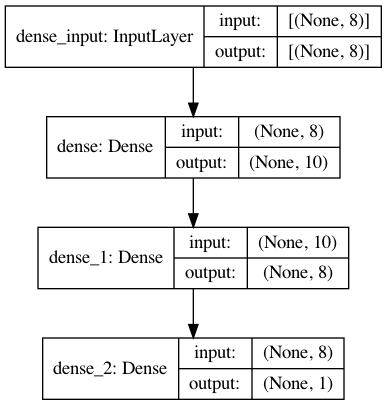

In [1]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

# 4.2 How to Plot Model Learning Curves

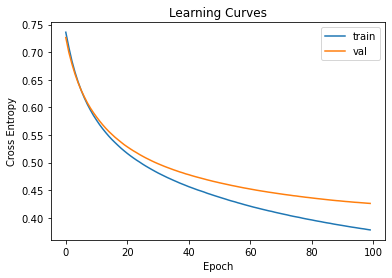

In [8]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# 4.3 How to Save and Load Your Model

In [9]:
# example of saving a fit model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# save model to file
model.save('model.h5')

In [10]:
# example of loading a saved model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# load the model from file
model = load_model('model.h5')
# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

Predicted: 0.841


# 5. How to Get Better Model Performance

# 5.1 How to Reduce Overfitting With Dropout

In [12]:
# example of using dropout
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# 5.2 How to Accelerate Training With Batch Normalization

In [13]:
# example of using batch normalization
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# 5.3 How to Halt Training at the Right Time With Early Stopping

In [15]:
# example of using early stopping
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)
# fit the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=0, validation_split=0.3, callbacks=[es])